In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit
import re

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

# ABCD with btagsum 

In [2]:
bkgtrees = ObjIter([Tree(fc.eightb.preselection.Bkg_MC_List)])

In [3]:
signaltrees = ObjIter([ Tree(f) for f in fc.eightb.preselection.signal_list ])

In [4]:
for tree in signaltrees: tree.color=None

In [5]:
(signaltrees[[0,4,7]]+bkgtrees).apply(eightb.calc_m_asym)

[None, None, None, None]

In [6]:
(signaltrees[[0,4,7]]+bkgtrees).apply(eightb.set_asym)
(signaltrees[[0,4,7]]+bkgtrees).apply(eightb.hm_asym_diff)


[None, None, None, None]

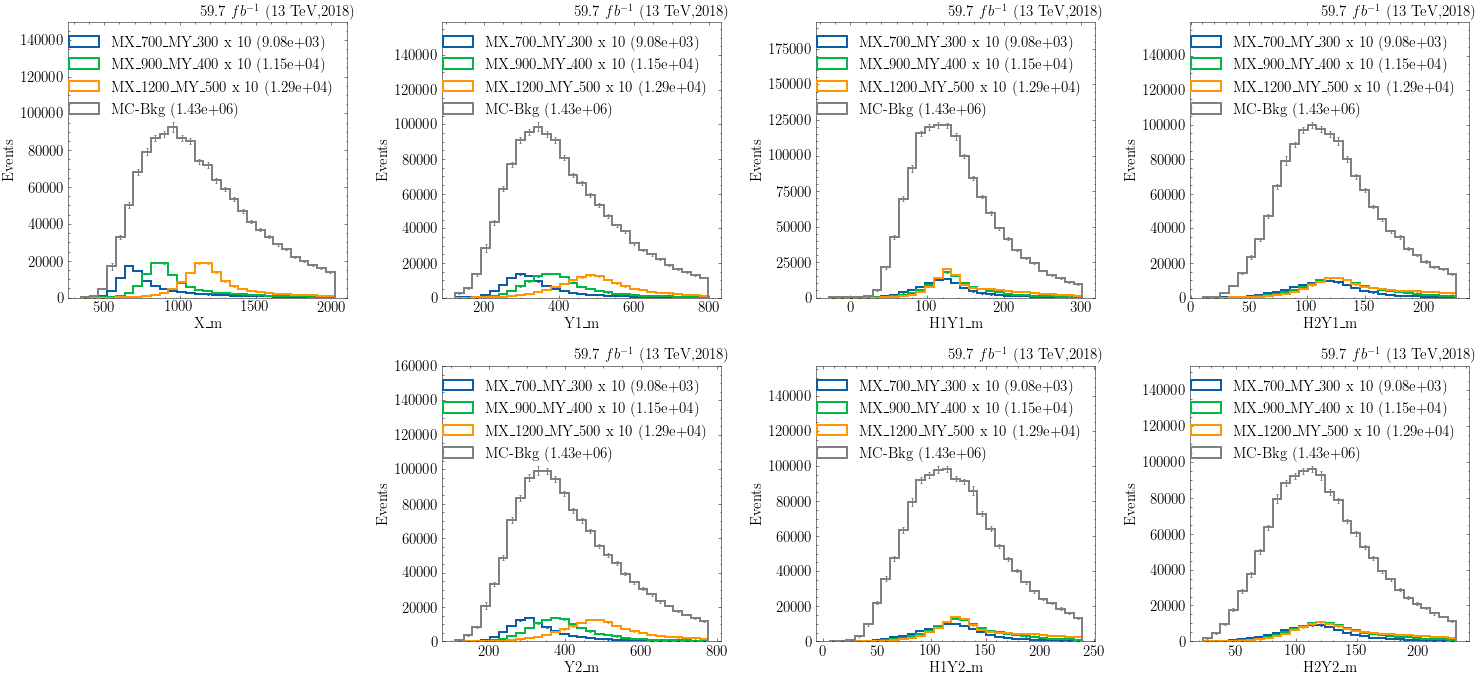

In [7]:
study.quick(
    signaltrees[[0,4,7]] + bkgtrees, 
    varlist=["X_m","Y1_m","H1Y1_m","H2Y1_m", None,"Y2_m","H1Y2_m","H2Y2_m"],
    scale=[10]*3+[1],
    # binlist=[np.linspace(0,300,30)]*4,
    dim=(-1,4),
    # density=True,
    legend=True
);

In [8]:
def count_jets(tree):
    jet_btag = ak.concatenate([ array[:,None] for array in ak.unzip(tree[[f"{bjet}_btag" for bjet in eightb.quarklist]])],axis=-1)
    tree.extend(
        jet8_btagsum = ak.sum(jet_btag,axis=-1),
        n_loose_btag = ak.sum(jet_btag > jet_btagWP[1],axis=-1),
        n_medium_btag = ak.sum(jet_btag > jet_btagWP[2],axis=-1),
        n_tight_btag = ak.sum(jet_btag > jet_btagWP[3],axis=-1),
    )

In [9]:
(signaltrees[[0,4,7]] + bkgtrees).apply(count_jets)

[None, None, None, None]

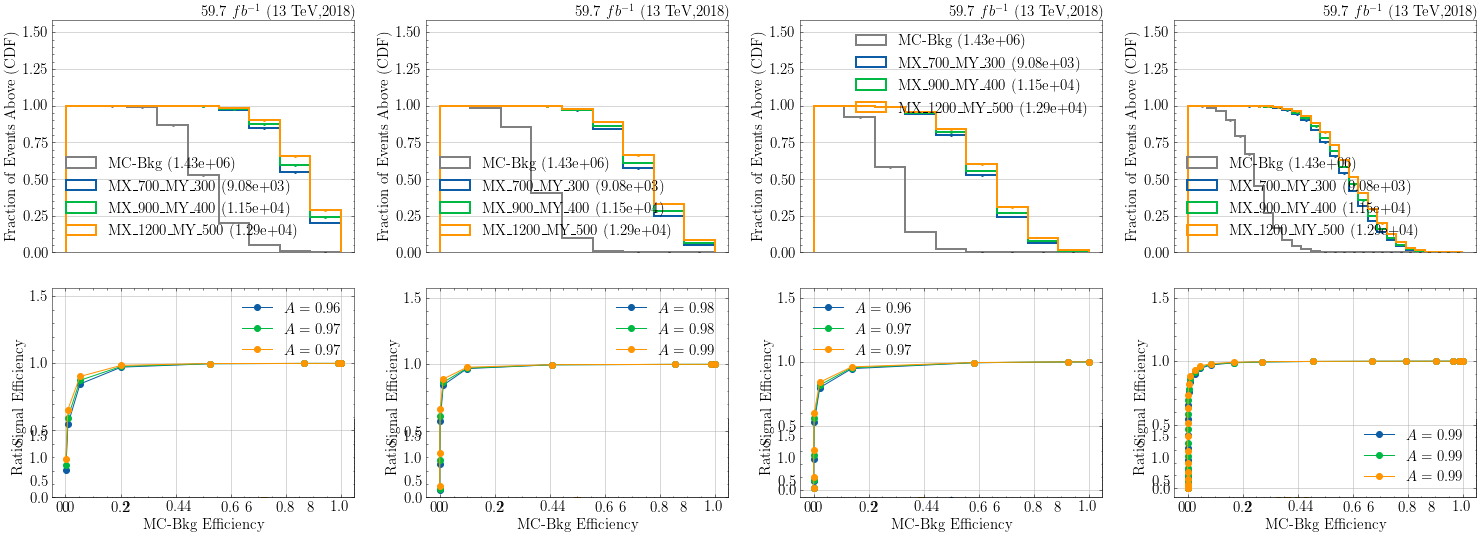

In [35]:
varinfo.jet8_btagsum = dict(bins=np.linspace(0,9,30))

fig, axs = study.quick(
    bkgtrees + signaltrees[[0,4,7]],
    varlist=["n_loose_btag","n_medium_btag","n_tight_btag","jet8_btagsum"],
    binlist=[range(10)]*3,
    # scale=[10]*3+[1],
    density=True,
    cumulative=-1,
    grid=True,
    r_y=8,
    # histo=False,
    ratio=True,
    correlation=True,
    c_size='90%',
    c_legend=True,
    c_xlabel='MC-Bkg Efficiency',
    c_ylabel='Signal Efficiency',
    # binlist=[np.linspace(0,300,30)]*4,
    dim=(-1,4),
    # density=True,
    legend=True
);

In [17]:
ax = axs[-1]

In [34]:
[ child.get_label() for child in ax.get_children()]

['MC-Bkg (1.43e+06)',
 '_nolegend_',
 '_nolegend_',
 '_nolegend_',
 'MX_700_MY_300 (9.08e+03)',
 '_nolegend_',
 '_nolegend_',
 '_nolegend_',
 'MX_900_MY_400 (1.15e+04)',
 '_nolegend_',
 '_nolegend_',
 '_nolegend_',
 'MX_1200_MY_500 (1.29e+04)',
 '_nolegend_',
 '_nolegend_',
 '_nolegend_',
 '',
 '',
 '',
 '',
 '',
 Text(0.5, 261.77128921090986, 'jet8_btagsum'),
 Text(1140.3939601494399, 0.5, 'Fraction of Events Above (CDF)'),
 '',
 '',
 '',
 '',
 '']

'_nolegend_'

In [11]:
targ_trees = (signaltrees[[0,4,7]]+bkgtrees).apply(eightb.target_filter_v2.filter)

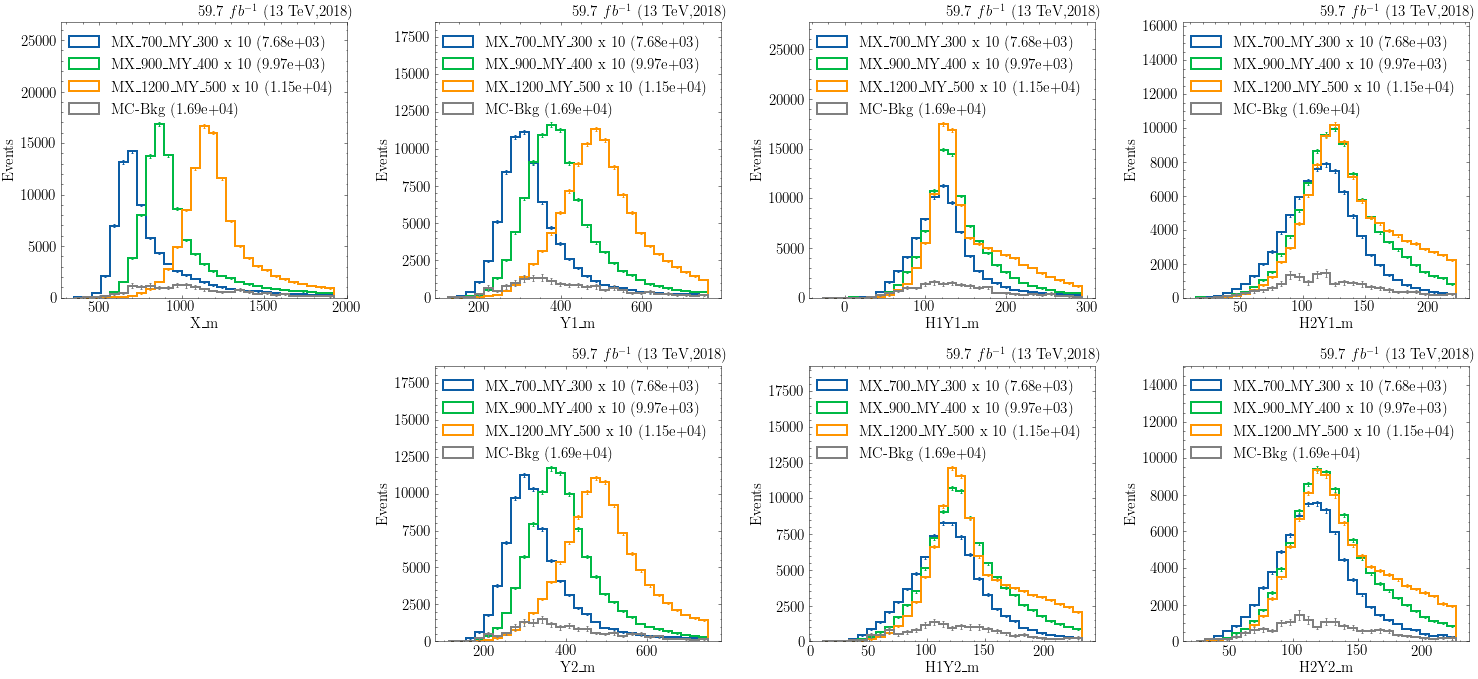

In [12]:
study.quick(
    targ_trees, 
    varlist=["X_m","Y1_m","H1Y1_m","H2Y1_m", None,"Y2_m","H1Y2_m","H2Y2_m"],
    scale=[10]*3+[1],
    # binlist=[np.linspace(0,300,30)]*4,
    dim=(-1,4),
    # density=True,
    legend=True
);

In [13]:
est_trees = (signaltrees[[0,4,7]]+bkgtrees).apply(eightb.estimation_filter_v2.filter)

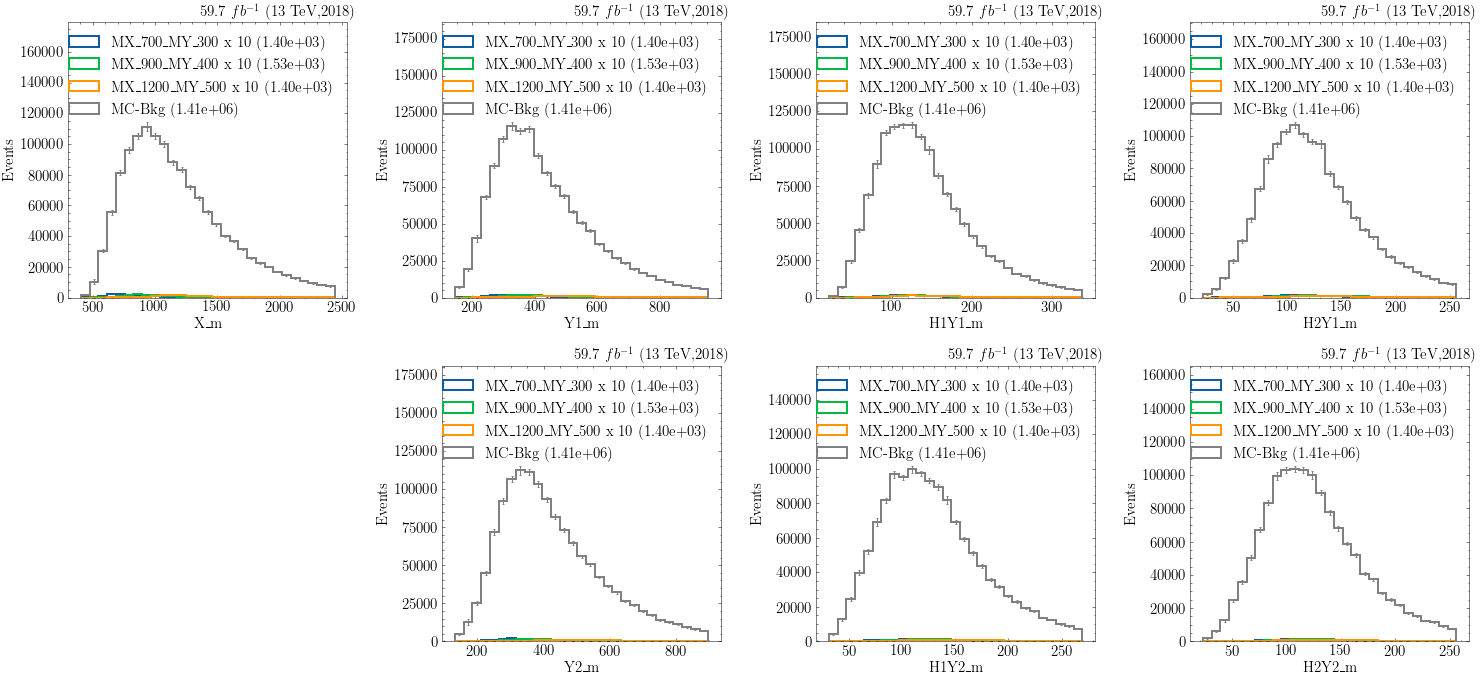

In [14]:
study.quick(
    est_trees, 
    varlist=["X_m","Y1_m","H1Y1_m","H2Y1_m", None,"Y2_m","H1Y2_m","H2Y2_m"],
    scale=[10]*3+[1],
    # binlist=[np.linspace(0,300,30)]*4,
    dim=(-1,4),
    # density=True,
    legend=True
);

In [15]:
varinfo.hm12_asym = dict(bins=np.linspace(0,0.5,30))
varinfo.hm13_asym = dict(bins=np.linspace(0,0.5,30))
varinfo.hm14_asym = dict(bins=np.linspace(0,0.5,30))
varinfo.hm23_asym = dict(bins=np.linspace(0,0.5,30))
varinfo.hm24_asym = dict(bins=np.linspace(0,0.5,30))
varinfo.hm34_asym = dict(bins=np.linspace(0,0.5,30))


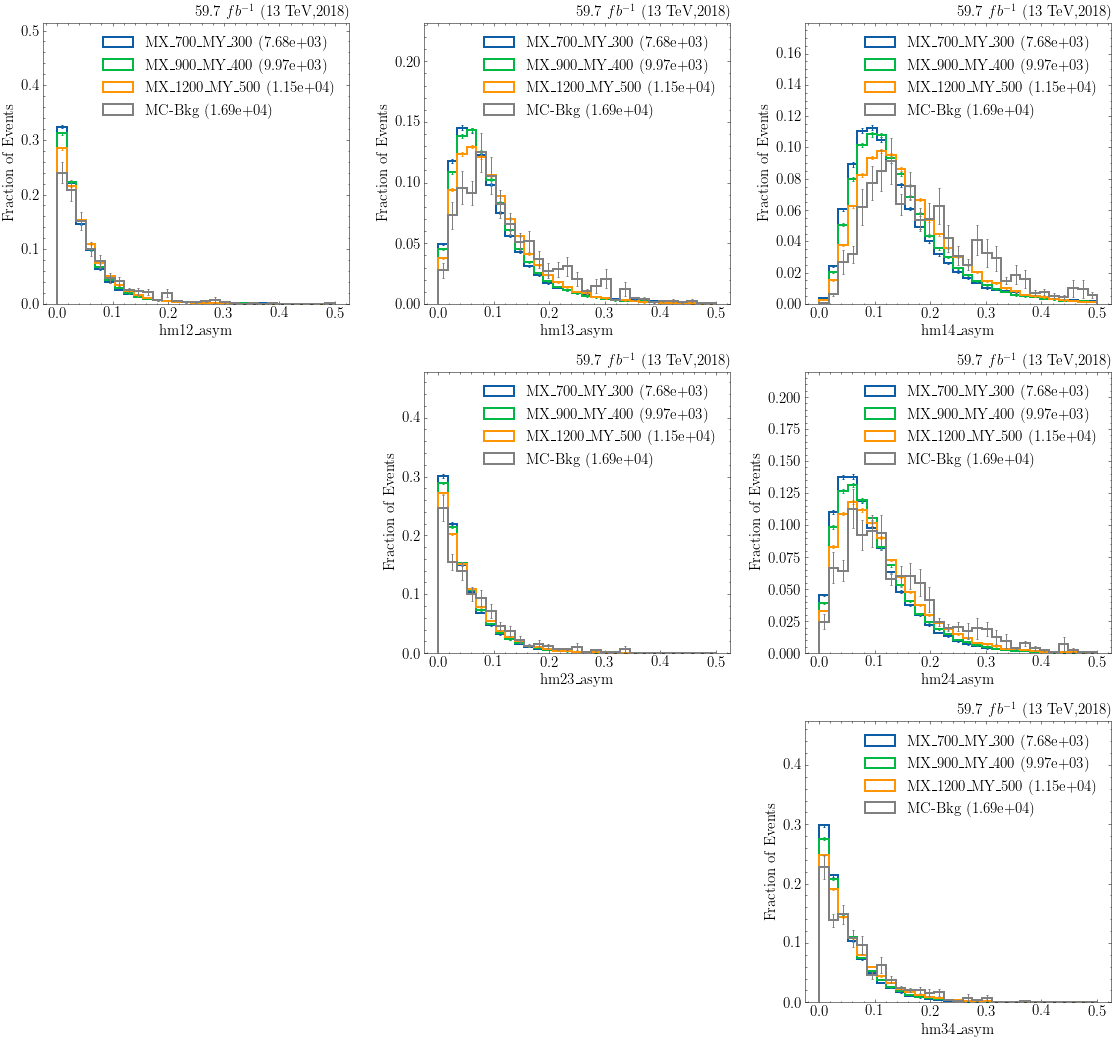

In [16]:
study.quick(
    targ_trees, 
    varlist=["hm12_asym","hm13_asym","hm14_asym",None,"hm23_asym","hm24_asym",None,None,"hm34_asym"],
    # scale=[10]*3+[1],
    # binlist=[np.linspace(0,300,30)]*4,
    dim=(-1,3),
    density=True,
    legend=True
);

In [17]:
varinfo.hm13_asym = dict(bins=np.linspace(0,1.0,30))
varinfo.hm14_asym = dict(bins=np.linspace(0,1.0,30))
varinfo.hm24_asym = dict(bins=np.linspace(0,1.0,30))

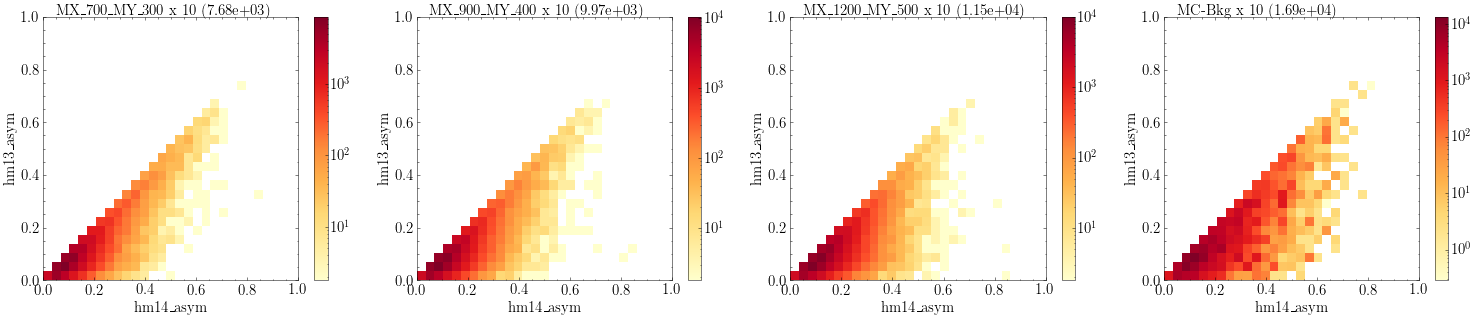

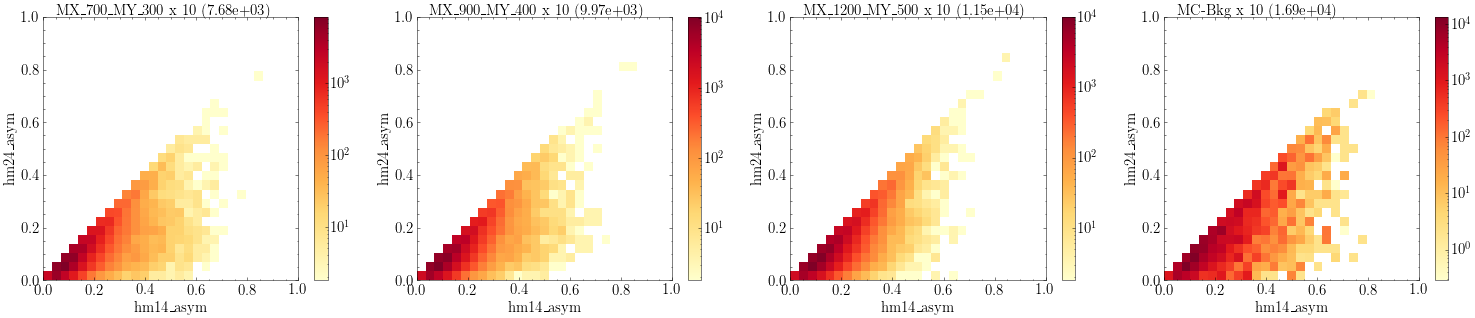

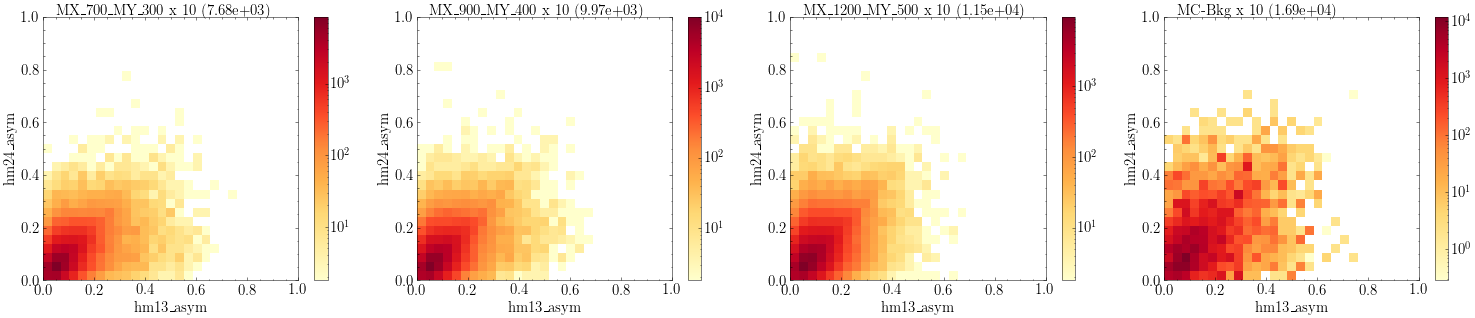

In [18]:
study.quick2d(
    targ_trees, 
    varlist=["hm14_asym","hm13_asym"],
    scale=[10]*3+[1],
    # binlist=[np.linspace(0,300,30)]*4,
    log=True,
    dim=(-1,4),
    # density=True,
);

study.quick2d(
    targ_trees, 
    varlist=["hm14_asym","hm24_asym"],
    scale=[10]*3+[1],
    # binlist=[np.linspace(0,300,30)]*4,
    log=True,
    dim=(-1,4),
    # density=True,
);

study.quick2d(
    targ_trees, 
    varlist=["hm13_asym","hm24_asym"],
    scale=[10]*3+[1],
    # binlist=[np.linspace(0,300,30)]*4,
    log=True,
    dim=(-1,4),
    # density=True,
);

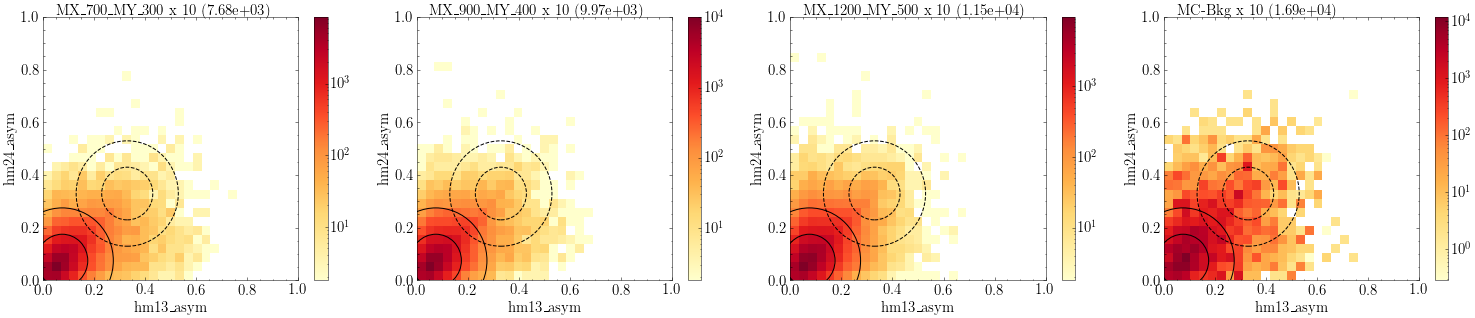

In [19]:
fig,axs = study.quick2d(
    targ_trees, 
    varlist=["hm13_asym","hm24_asym"],
    scale=[10]*3+[1],
    # binlist=[np.linspace(0,300,30)]*4,
    log=True,
    dim=(-1,4),
    # density=True,
)

for ax in axs.flat:
    
    asr = plt.Circle(eightb.ar,eightb.sr,color='black',fill=None)
    acr = plt.Circle(eightb.ar,eightb.cr,color='black',fill=None)
    vsr = plt.Circle(eightb.vr,eightb.sr,color='black',fill=None,linestyle='--')
    vcr = plt.Circle(eightb.vr,eightb.cr,color='black',fill=None,linestyle='--')
    for ring in (asr,acr,vsr,vcr): ax.add_patch(ring) 
    
plt.show()

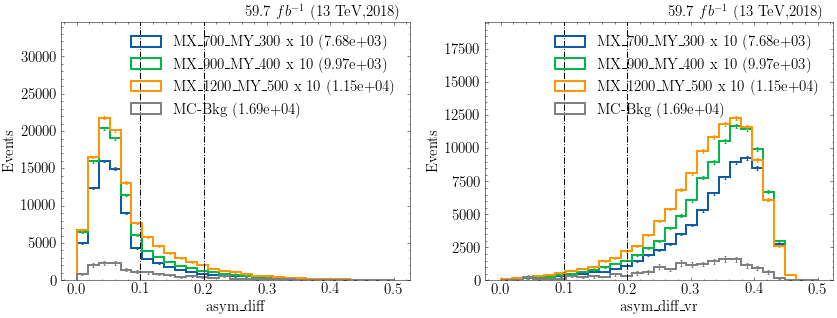

In [20]:
fig,axs = study.quick(
    targ_trees,
    varlist=["asym_diff","asym_diff_vr"],
    scale=[10]*3+[1],
    binlist=[np.linspace(0,0.5,30)]*2,
    dim=(-1,2), 
    # density=True,
    legend=True
)

for ax in axs.flat:
    ax.plot([eightb.sr,eightb.sr], ax.get_ylim(),color='black',linestyle='-.')
    ax.plot([eightb.cr,eightb.cr], ax.get_ylim(),color='black',linestyle='-.')
    

In [21]:
region_filters = {
    'asrt':FilterSequence(eightb.target_filter_v2, eightb.asr_filter),
    'asre':FilterSequence(eightb.estimation_filter_v2, eightb.asr_filter),
    'acrt':FilterSequence(eightb.target_filter_v2, eightb.acr_filter),
    'acre':FilterSequence(eightb.estimation_filter_v2, eightb.acr_filter), 
    'vsrt':FilterSequence(eightb.target_filter_v2, eightb.vsr_filter),
    'vsre':FilterSequence(eightb.estimation_filter_v2, eightb.vsr_filter),
    'vcrt':FilterSequence(eightb.target_filter_v2, eightb.vcr_filter),
    'vcre':FilterSequence(eightb.estimation_filter_v2, eightb.vcr_filter),
}

In [22]:
signal_regions = { key: signaltrees[[0,4,7]].apply(filter.filter) for key,filter in region_filters.items() }
bkg_regions = { key: bkgtrees.apply(filter.filter) for key,filter in region_filters.items() }

In [28]:
signal_yields = { key: trees.expected_events().npy for key,trees in signal_regions.items() }
bkg_yields = { key: trees.expected_events().npy for key,trees in bkg_regions.items() }


In [24]:
signal_eff = { key: trees.expected_events().npy/(signaltrees[[0,4,7]].expected_events().npy) for key,trees in signal_regions.items() }
bkg_eff = { key: trees.expected_events().npy/(bkgtrees.expected_events().npy) for key,trees in bkg_regions.items() }


In [25]:
def plot_grid(*yields,figax=None, vmax=None,**kwargs):
    if figax is None: figax = plt.subplots()
    fig,ax = figax
    array = np.array([ get_avg_std(nevents) for nevents in yields])
    
    means = array[:,0].reshape(2,2)
    std   = array[:,1].reshape(2,2)
    
    vmin = 0
    if vmax is None: vmax = np.max(means)
    
    im = ax.imshow(means,vmin=vmin,vmax=vmax,cmap='YlOrRd')
    ax.set(yticks=[0,1],yticklabels=['SR','CR'],xticks=[0,1],xticklabels=['TR','ER'],**kwargs)
    for i in range(2):
        for j in range(2):
            txt = f'{means[j,i]:0.3f}'
            if (std[j,i] > 0): txt += f'$\pm${std[j,i]:0.3f}'
            ax.text(i,j,f'{txt}',ha="center", va="center", fontweight="bold")
    

In [30]:
ar_keys = ['asrt','asre','acrt','acre']
vr_keys = ['vsrt','vsre','vcrt','vcre']

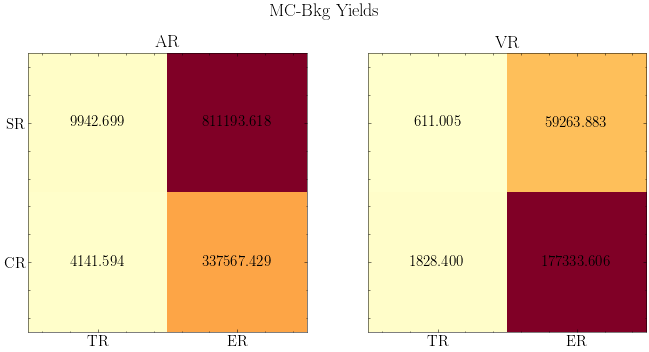

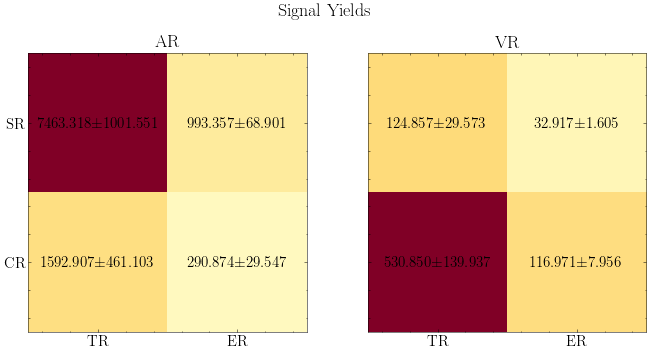

In [31]:
fig,axs = plt.subplots(ncols=2,figsize=(10,5),sharey=True)
plot_grid(*[ bkg_yields[key] for key in ar_keys ], figax=(fig,axs[0]), title='AR')
plot_grid(*[ bkg_yields[key] for key in vr_keys ], figax=(fig,axs[1]), title='VR')
fig.suptitle('MC-Bkg Yields')
fig.tight_layout()

fig,axs = plt.subplots(ncols=2,figsize=(10,5),sharey=True)
plot_grid(*[ signal_yields[key] for key in ar_keys ], figax=(fig,axs[0]), title='AR')
plot_grid(*[ signal_yields[key] for key in vr_keys ], figax=(fig,axs[1]), title='VR')
fig.suptitle('Signal Yields')
fig.tight_layout()

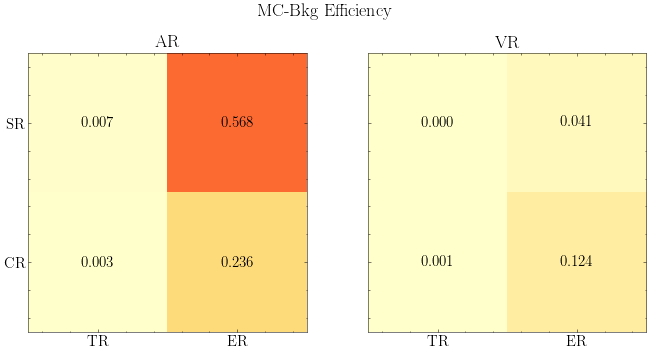

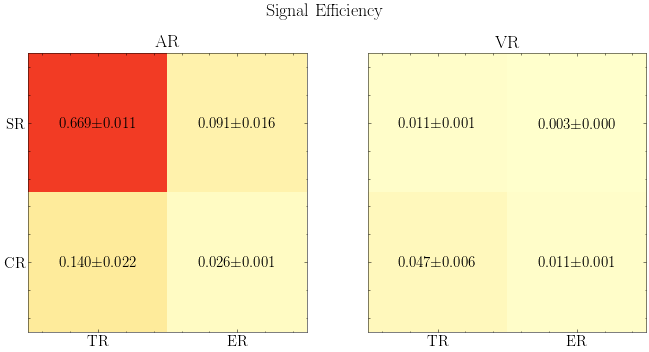

In [32]:
fig,axs = plt.subplots(ncols=2,figsize=(10,5),sharey=True)
plot_grid(*[ bkg_eff[key] for key in ar_keys ], figax=(fig,axs[0]), title='AR', vmax=1)
plot_grid(*[ bkg_eff[key] for key in vr_keys ], figax=(fig,axs[1]), title='VR', vmax=1)
fig.suptitle('MC-Bkg Efficiency')
fig.tight_layout()

fig,axs = plt.subplots(ncols=2,figsize=(10,5),sharey=True)
plot_grid(*[ signal_eff[key] for key in ar_keys ], figax=(fig,axs[0]), title='AR', vmax=1)
plot_grid(*[ signal_eff[key] for key in vr_keys ], figax=(fig,axs[1]), title='VR', vmax=1)
fig.suptitle('Signal Efficiency')
fig.tight_layout()

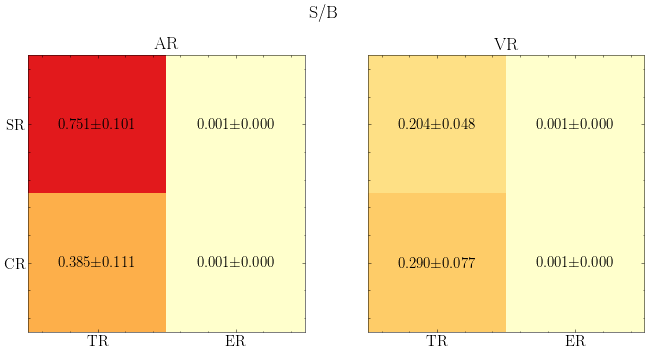

In [33]:
fig,axs = plt.subplots(ncols=2,figsize=(10,5),sharey=True)
plot_grid(*[ signal_yields[key]/bkg_yields[key] for key in ar_keys ], figax=(fig,axs[0]), title='AR', vmax=1)
plot_grid(*[ signal_yields[key]/bkg_yields[key] for key in vr_keys ], figax=(fig,axs[1]), title='VR', vmax=1)
fig.suptitle('S/B')
fig.tight_layout()